Pandas Datareader: Remote data access for pandas
pip install pandas_datareader
datareader page has a list of remote api's you cna access

In [44]:
import pandas_datareader as pdr

In [45]:
import datetime as dt

In [46]:
import matplotlib.pyplot as plt 
%matplotlib notebook

In [47]:
ticker = "AAPL"
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021, 12, 31)

#after the pdr hit tab or shift+tab to get all the options
data = pdr.get_data_yahoo(ticker, start, end)

In [48]:
data.head()

High         Low        Open       Close       Volume  \
Date                                                                      
2021-01-04  133.610001  126.760002  133.520004  129.410004  143301900.0   
2021-01-05  131.740005  128.429993  128.889999  131.009995   97664900.0   
2021-01-06  131.050003  126.379997  127.720001  126.599998  155088000.0   
2021-01-07  131.630005  127.860001  128.360001  130.919998  109578200.0   
2021-01-08  132.630005  130.229996  132.429993  132.050003  105158200.0   

             Adj Close  
Date                    
2021-01-04  128.453461  
2021-01-05  130.041595  
2021-01-06  125.664215  
2021-01-07  129.952286  
2021-01-08  131.073929

In [49]:
data.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2021-12-27  180.419998  177.070007  177.089996  180.330002  74919600.0   
2021-12-28  181.330002  178.529999  180.160004  179.289993  79144300.0   
2021-12-29  180.630005  178.139999  179.330002  179.380005  62348900.0   
2021-12-30  180.570007  178.089996  179.470001  178.199997  59773000.0   
2021-12-31  179.229996  177.259995  178.089996  177.570007  64062300.0   

             Adj Close  
Date                    
2021-12-27  180.100540  
2021-12-28  179.061859  
2021-12-29  179.151749  
2021-12-30  177.973251  
2021-12-31  177.344055

In [50]:
#check the data type of index
data.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [51]:
#check the data types of the columns
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

<IPython.core.display.Javascript object>


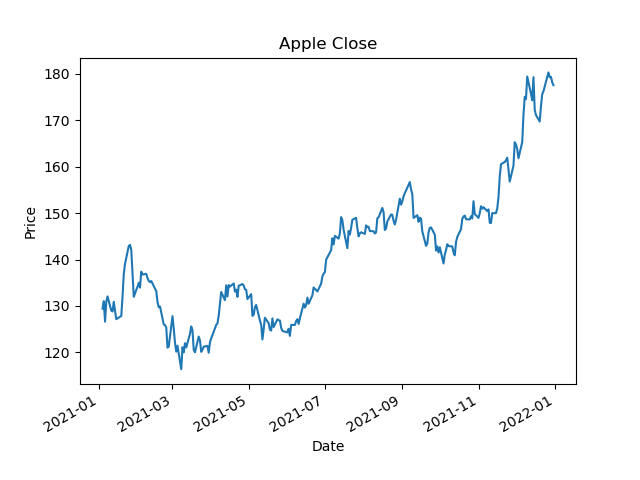

Text(0.5, 1.0, 'Apple Close')

In [52]:
fig, ax = plt.subplots()
data['Close'].plot(ax=ax)
ax.set_ylabel("Price")
ax.set_title("Apple Close")

In [53]:
#this also has an api where you dont need a key
data2 = pdr.get_data_stooq(ticker, start)

In [54]:
data2.head()

Open      High     Low   Close    Volume
Date                                                  
2022-02-11  172.33  173.0800  168.04  168.64  98670687
2022-02-10  174.14  175.4800  171.55  172.12  90865899
2022-02-09  176.05  176.6500  174.90  176.28  71285038
2022-02-08  171.73  175.3500  171.43  174.83  74829217
2022-02-07  172.86  173.9458  170.95  171.66  77251204

In [58]:
#playing around with Fed Data
gdp = pdr.DataReader('GDP', 'fred', start, end)

In [59]:
gdp.head()

GDP
DATE                 
2021-01-01  22038.226
2021-04-01  22740.959
2021-07-01  23202.344
2021-10-01  23992.355

In [60]:
gdp.loc['2021-10-01']

GDP    23992.355
Name: 2021-10-01 00:00:00, dtype: float64

In [63]:
# These two datasets are: 
#     CPI for All Urban Consumers in US City
#     CPI for All Urban Consumers in US City less Food and Energy

inflation = pdr.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)

In [64]:
inflation.head()

CPIAUCSL  CPILFESL
DATE                          
2021-01-01   262.200   270.114
2021-02-01   263.346   270.522
2021-03-01   265.028   271.347
2021-04-01   266.727   273.669
2021-05-01   268.599   275.715

In [67]:
#testing nasdaq symbols
nasdaq_symbols = pdr.get_nasdaq_symbols()

In [68]:
nasdaq_symbols

Nasdaq Traded                                      Security Name  \
Symbol                                                                     
A                True            Agilent Technologies, Inc. Common Stock   
AA               True                    Alcoa Corporation Common Stock    
AAA              True  Listed Funds Trust AAF First Priority CLO Bond...   
AAAU             True             Goldman Sachs Physical Gold ETF Shares   
AAC              True  Ares Acquisition Corporation Class A Ordinary ...   
...               ...                                                ...   
ZXZZT            True                                  NASDAQ TEST STOCK   
ZY               True                       Zymergen Inc. - Common Stock   
ZYME             True                       Zymeworks Inc. Common Shares   
ZYNE             True       Zynerba Pharmaceuticals, Inc. - Common Stock   
ZYXI             True                         Zynex, Inc. - Common Stock   

       Listing Exchange Market Category    ETF  Round Lot Size  Test Issue  \
Symbol                                                                       
A                     N                  False           100.0       False   
AA                    N                  False           100.0       False   
AAA                   P                   True           100.0       False   
AAAU                  Z                   True           100.0       False   
AAC                   N                  False           100.0       False   
...                 ...             ...    ...             ...         ...   
ZXZZT                 Q               G  False           100.0        True   
ZY                    Q               Q  False           100.0       False   
ZYME                  N                  False           100.0       False   
ZYNE                  Q               G  False           100.0       False   
ZYXI                  Q               Q  False           100.0       False   

       Financial Status CQS Symbol NASDAQ Symbol  NextShares  
Symbol                                                        
A                   NaN          A             A       False  
AA                  NaN         AA            AA       False  
AAA                 NaN        AAA           AAA       False  
AAAU                NaN       AAAU          AAAU       False  
AAC                 NaN        AAC           AAC       False  
...                 ...        ...           ...         ...  
ZXZZT                 N        NaN         ZXZZT       False  
ZY                    N        NaN            ZY       False  
ZYME                NaN       ZYME          ZYME       False  
ZYNE                  N        NaN          ZYNE       False  
ZYXI                  N        NaN          ZYXI       False  

[12001 rows x 11 columns]

In [70]:
nasdaq_symbols.loc['AAPL']

Nasdaq Traded                            True
Security Name       Apple Inc. - Common Stock
Listing Exchange                            Q
Market Category                             Q
ETF                                     False
Round Lot Size                          100.0
Test Issue                              False
Financial Status                            N
CQS Symbol                                NaN
NASDAQ Symbol                            AAPL
NextShares                              False
Name: AAPL, dtype: object

In [71]:
len(nasdaq_symbols)

12001